In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Visualize our data
import seaborn as sns

In [ ]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 148M/149M [00:04<00:00, 42.4MB/s]
100% 149M/149M [00:04<00:00, 35.8MB/s]


In [ ]:
# Creating a dataframe to the path of each set of data
def get_class_paths(path):
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
    label_path = os.path.join(path, label)

    #Check if it is a directory
    if os.path.isdir(label_path):
      # Iterate through images in the label directory
      for image in os.listdir(label_path):
        image_path = os.path.join(label_path, image)

        #Add class and path to respective lists
        classes.append(label)
        class_paths.append(image_path)

    # Create a dataframe with the collected data
  df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
  })

  return df

In [ ]:
tr_df = get_class_paths("/content/Training")

In [ ]:
tr_df

,Class Path,Class
0,/content/Training/glioma/Tr-gl_1248.jpg,glioma
1,/content/Training/glioma/Tr-gl_0416.jpg,glioma
2,/content/Training/glioma/Tr-gl_0619.jpg,glioma
3,/content/Training/glioma/Tr-gl_0329.jpg,glioma
4,/content/Training/glioma/Tr-gl_0055.jpg,glioma
...,...,...
5707,/content/Training/pituitary/Tr-pi_1444.jpg,pituitary
5708,/content/Training/pituitary/Tr-pi_0037.jpg,pituitary
5709,/content/Training/pituitary/Tr-pi_0333.jpg,pituitary
5710,/content/Training/pituitary/Tr-pi_1200.jpg,pituitary


In [ ]:
ts_df = get_class_paths("/content/Testing")

In [ ]:
ts_df

,Class Path,Class
0,/content/Testing/glioma/Te-gl_0289.jpg,glioma
1,/content/Testing/glioma/Te-gl_0295.jpg,glioma
2,/content/Testing/glioma/Te-gl_0167.jpg,glioma
3,/content/Testing/glioma/Te-gl_0237.jpg,glioma
4,/content/Testing/glioma/Te-gl_0084.jpg,glioma
...,...,...
1306,/content/Testing/pituitary/Te-pi_0246.jpg,pituitary
1307,/content/Testing/pituitary/Te-pi_0206.jpg,pituitary
1308,/content/Testing/pituitary/Te-pi_0184.jpg,pituitary
1309,/content/Testing/pituitary/Te-pi_0178.jpg,pituitary


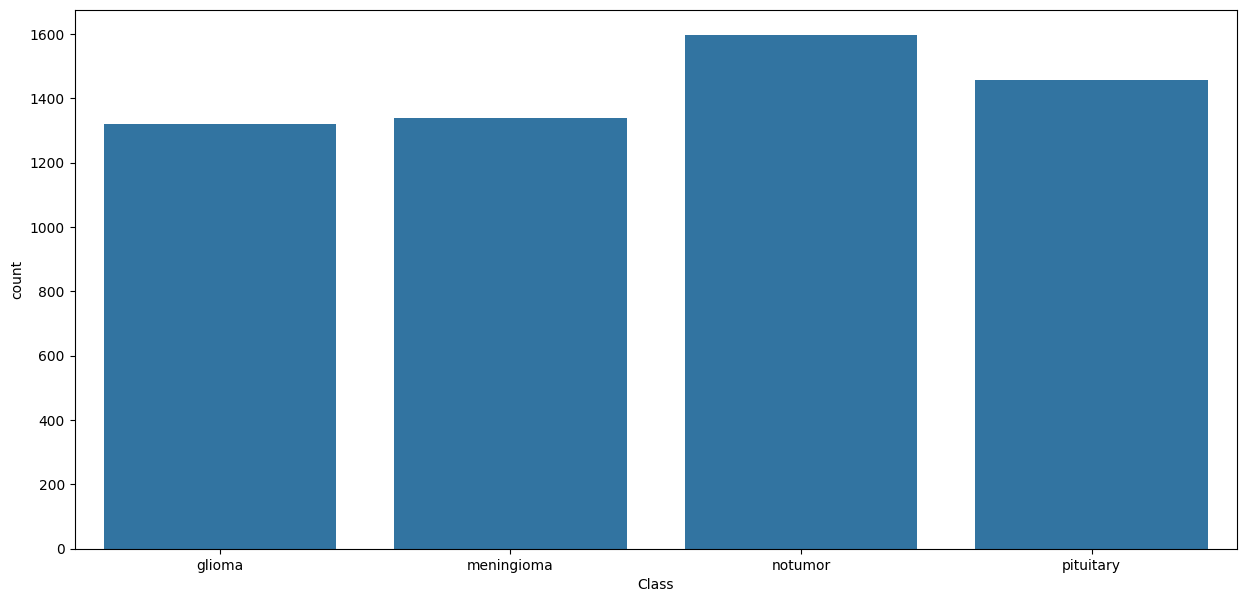

In [ ]:
# display count of images
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])

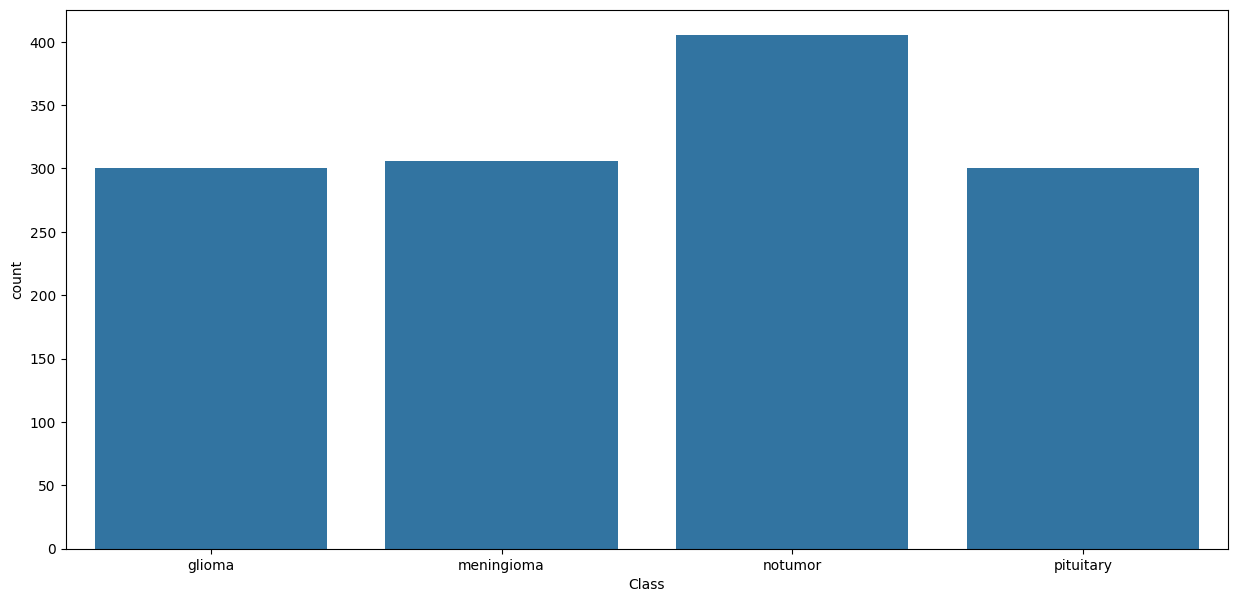

In [ ]:
# display count of images
plt.figure(figsize=(15, 7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])

In [ ]:
from sklearn.model_selection import train_test_split # Splits the data into training and testing datasets
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential # Build neural network model, adding layers one after the other
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [ ]:
valid_df

,Class Path,Class
120,/content/Testing/glioma/Te-gl_0280.jpg,glioma
559,/content/Testing/meningioma/Te-me_0078.jpg,meningioma
1258,/content/Testing/pituitary/Te-pi_0259.jpg,pituitary
954,/content/Testing/notumor/Te-no_0119.jpg,notumor
128,/content/Testing/glioma/Te-gl_0134.jpg,glioma
...,...,...
422,/content/Testing/meningioma/Te-me_0250.jpg,meningioma
1043,/content/Testing/pituitary/Te-pi_0284.jpg,pituitary
988,/content/Testing/notumor/Te-no_0274.jpg,notumor
234,/content/Testing/glioma/Te-gl_0154.jpg,glioma


In [ ]:
ts_df

,Class Path,Class
638,/content/Testing/notumor/Te-no_0349.jpg,notumor
1289,/content/Testing/pituitary/Te-pi_0024.jpg,pituitary
61,/content/Testing/glioma/Te-gl_0058.jpg,glioma
282,/content/Testing/glioma/Te-gl_0193.jpg,glioma
13,/content/Testing/glioma/Te-gl_0013.jpg,glioma
...,...,...
1153,/content/Testing/pituitary/Te-pi_0271.jpg,pituitary
68,/content/Testing/glioma/Te-gl_0252.jpg,glioma
11,/content/Testing/glioma/Te-gl_0228.jpg,glioma
1202,/content/Testing/pituitary/Te-pi_0272.jpg,pituitary


In [ ]:
# Preprocessing the data
batch_size = 32

img_size = (299, 299)

image_generator = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.8, 1.2)
)

ts_gen = ImageDataGenerator(
    rescale=1/255
)

In [ ]:
#Creating 3 data flows, testing, training, validating
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size,  target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size,  target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=16,  target_size=img_size, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


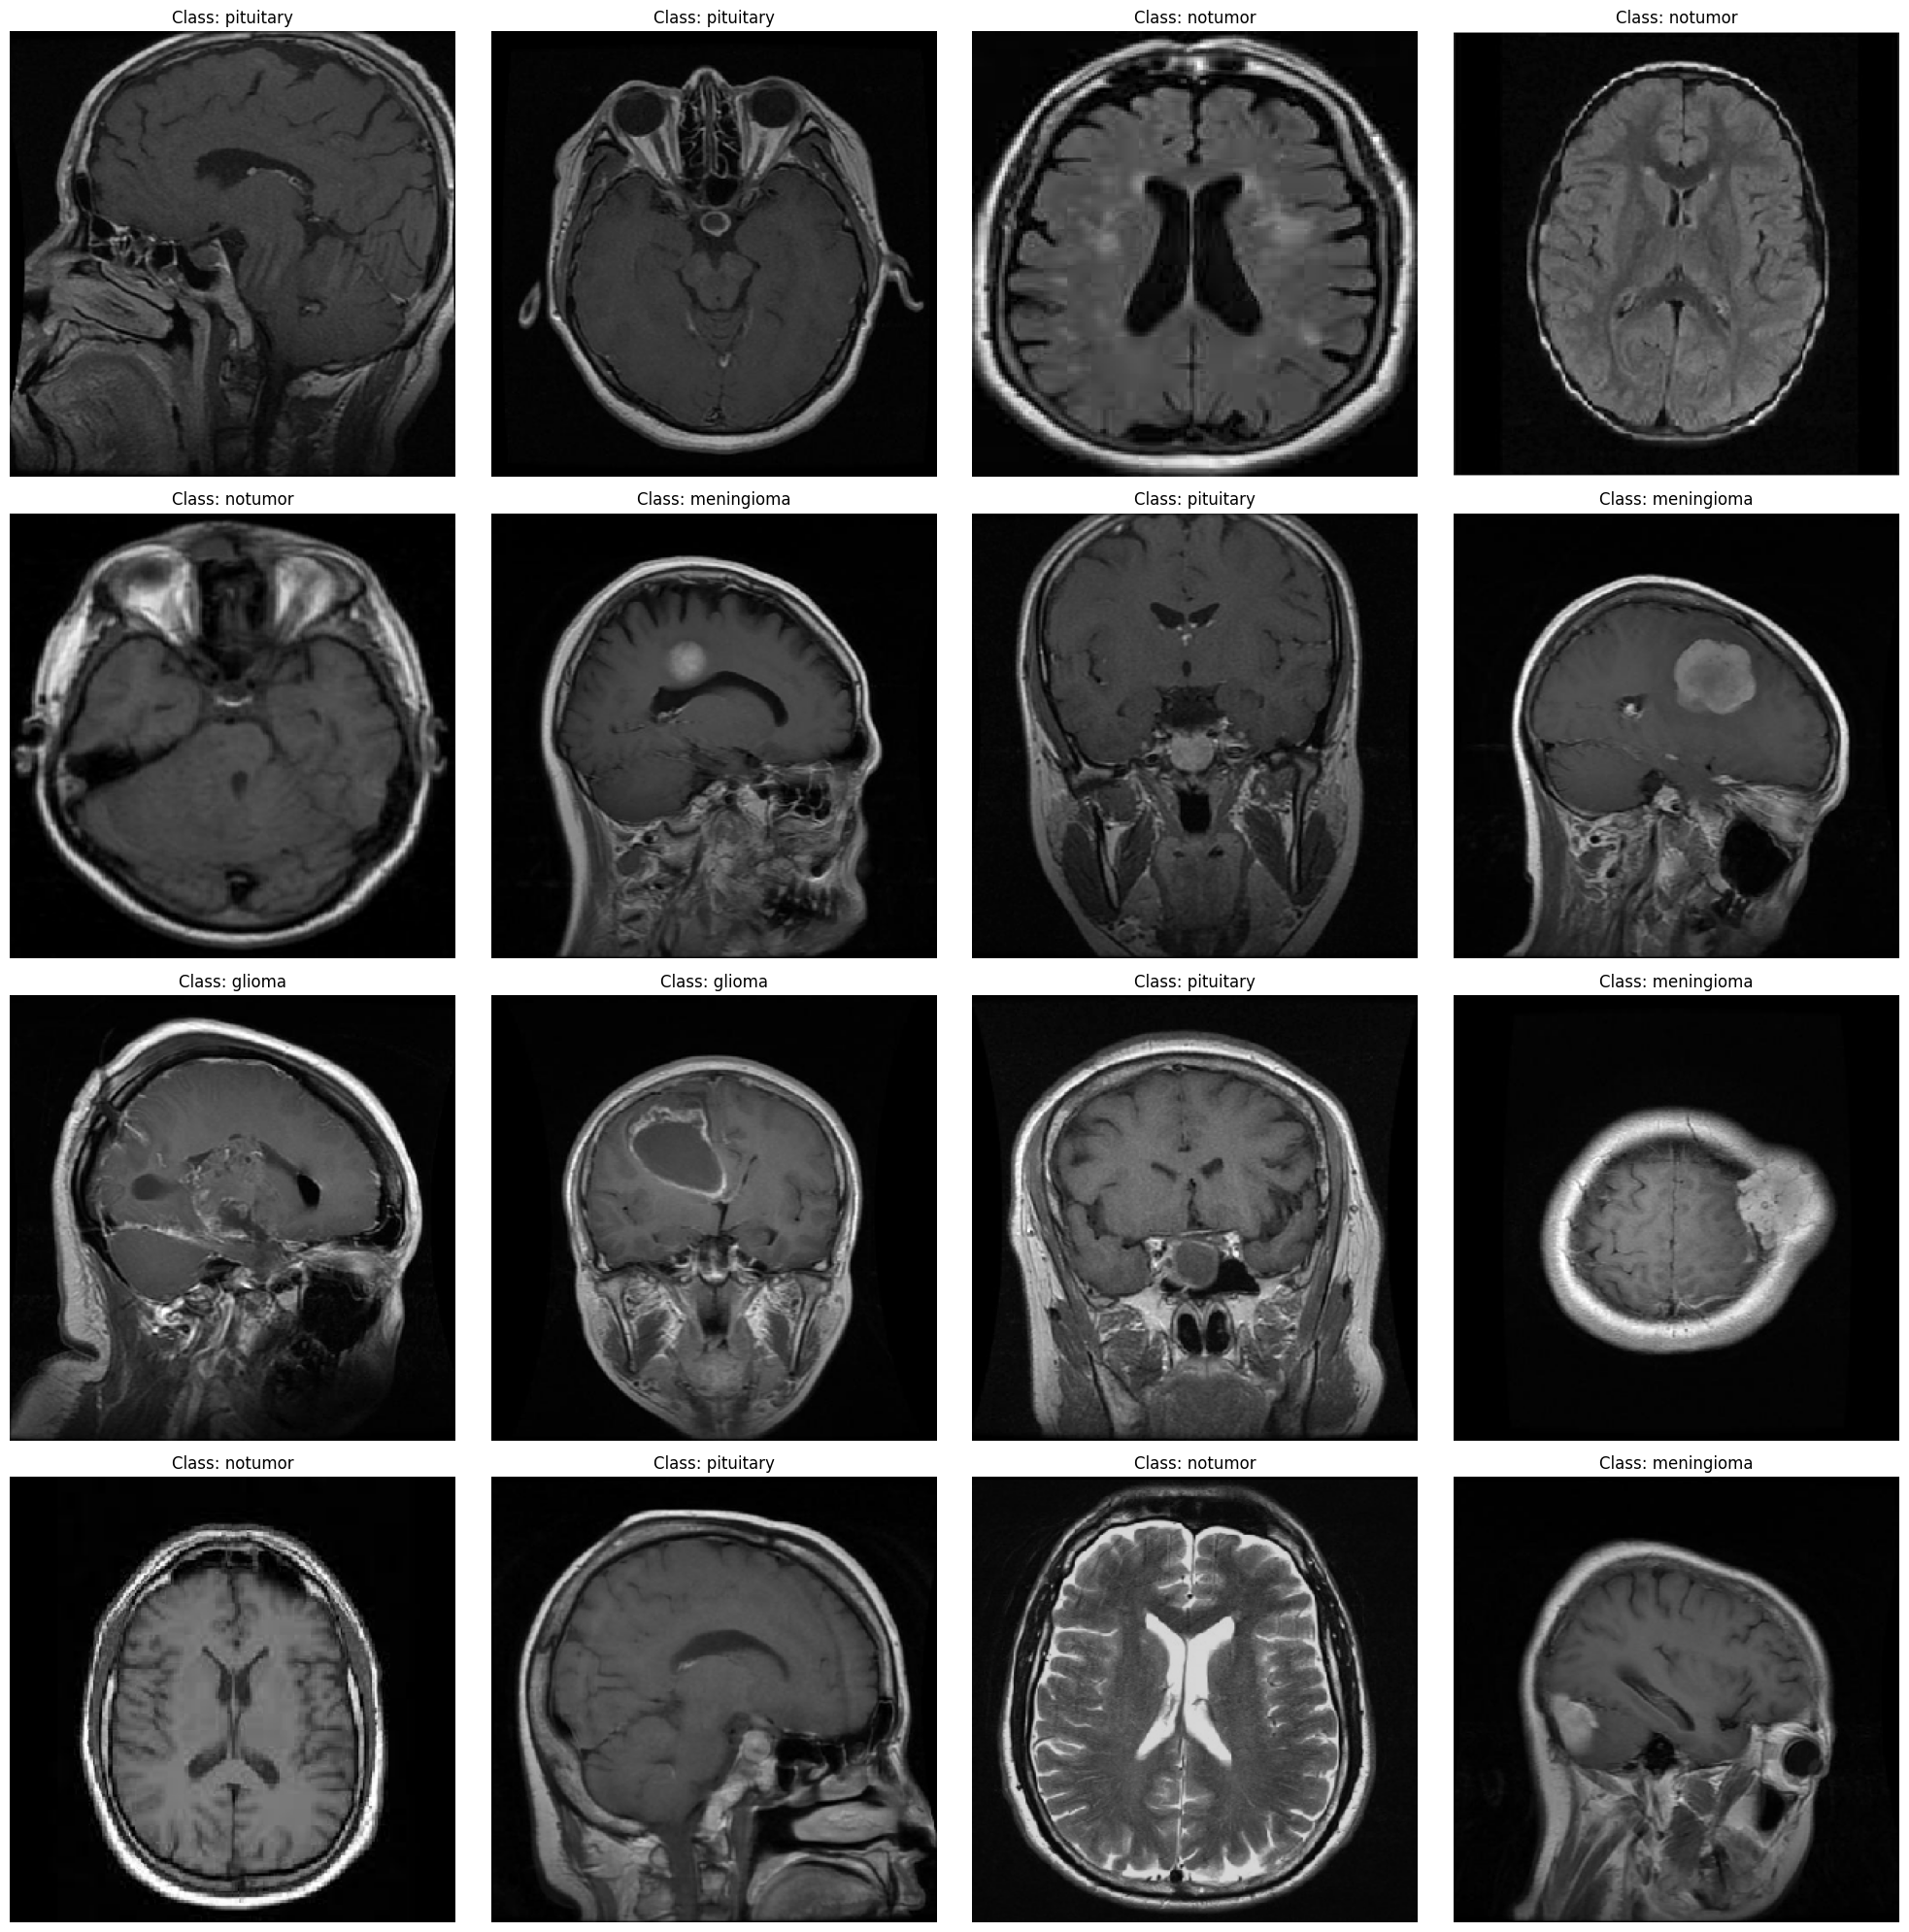

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(16):
  plt.subplot(4, 4, i+1)
  batch = next(tr_gen)
  image = batch[0][0]
  label = batch[1][0]
  plt.imshow(image)

  #Get the class index
  class_index = np.argmax(label)

  #Get the list of class names and class indices
  class_names = list(tr_gen.class_indices.keys())
  class_indices = list(tr_gen.class_indices.values())

  # Find the index of the class_index in the list of indices
  index_position = class_indices.index(class_index)

  # Get the class name using the index position
  class_name = class_names[index_position]

  plt.title(f"Class: {class_name}")
  plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Xception Model, breaks down image into smaller parts, looking at the parts one by one, learning from each mistake made to make predicitons
img_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top= False, weights="imagenet", input_shape=img_shape, pooling='max')

model = Sequential([
  base_model,
  Flatten(),
  Dropout(rate= 0.3), #prevent overfitting
  Dense(128, activation= 'relu'), #Helps model learn nonlinear relationships
  Dropout(rate=0.25),
  Dense(4, activation = 'softmax')
])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
model.compile(Adamax(learning_rate=0.001), #Adjusts how much the model learns per step, this takes smaller but more accurate steps
              loss= 'categorical_crossentropy', # Measures how wrong the prediction is
              metrics= ['accuracy',
              Precision(),
              Recall()])

In [ ]:
hist = model.fit(tr_gen, epochs=5, validation_data=valid_gen) #Epochs describe the amount of times the model looks at the training data to come up with better predicions

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 304s 1s/step - accuracy: 0.5908 - loss: 1.0186 - precision: 0.7751 - recall: 0.3933 - val_accuracy: 0.8305 - val_loss: 0.5320 - val_precision: 0.8486 - val_recall: 0.8214
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 887ms/step - accuracy: 0.9742 - loss: 0.0860 - precision: 0.9779 - recall: 0.9711 - val_accuracy: 0.8382 - val_loss: 0.3975 - val_precision: 0.8701 - val_recall: 0.8183
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 890ms/step - accuracy: 0.9867 - loss: 0.0366 - precision: 0.9883 - recall: 0.9844 - val_accuracy: 0.9817 - val_loss: 0.0552 - val_precision: 0.9831 - val_recall: 0.9786
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 894ms/step - accuracy: 0.9919 - loss: 0.0268 - precision: 0.9920 - recall: 0.9905 - val_accuracy: 0.9832 - val_loss: 0.0506 - val_precision: 0.9832 - val_recall: 0.9832
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 206s 918ms/step - accuracy: 0.9959 - loss: 0.0130 - precision: 0.9960 - recall: 0.9956 - val_accuracy: 0.9863 - val_loss: 

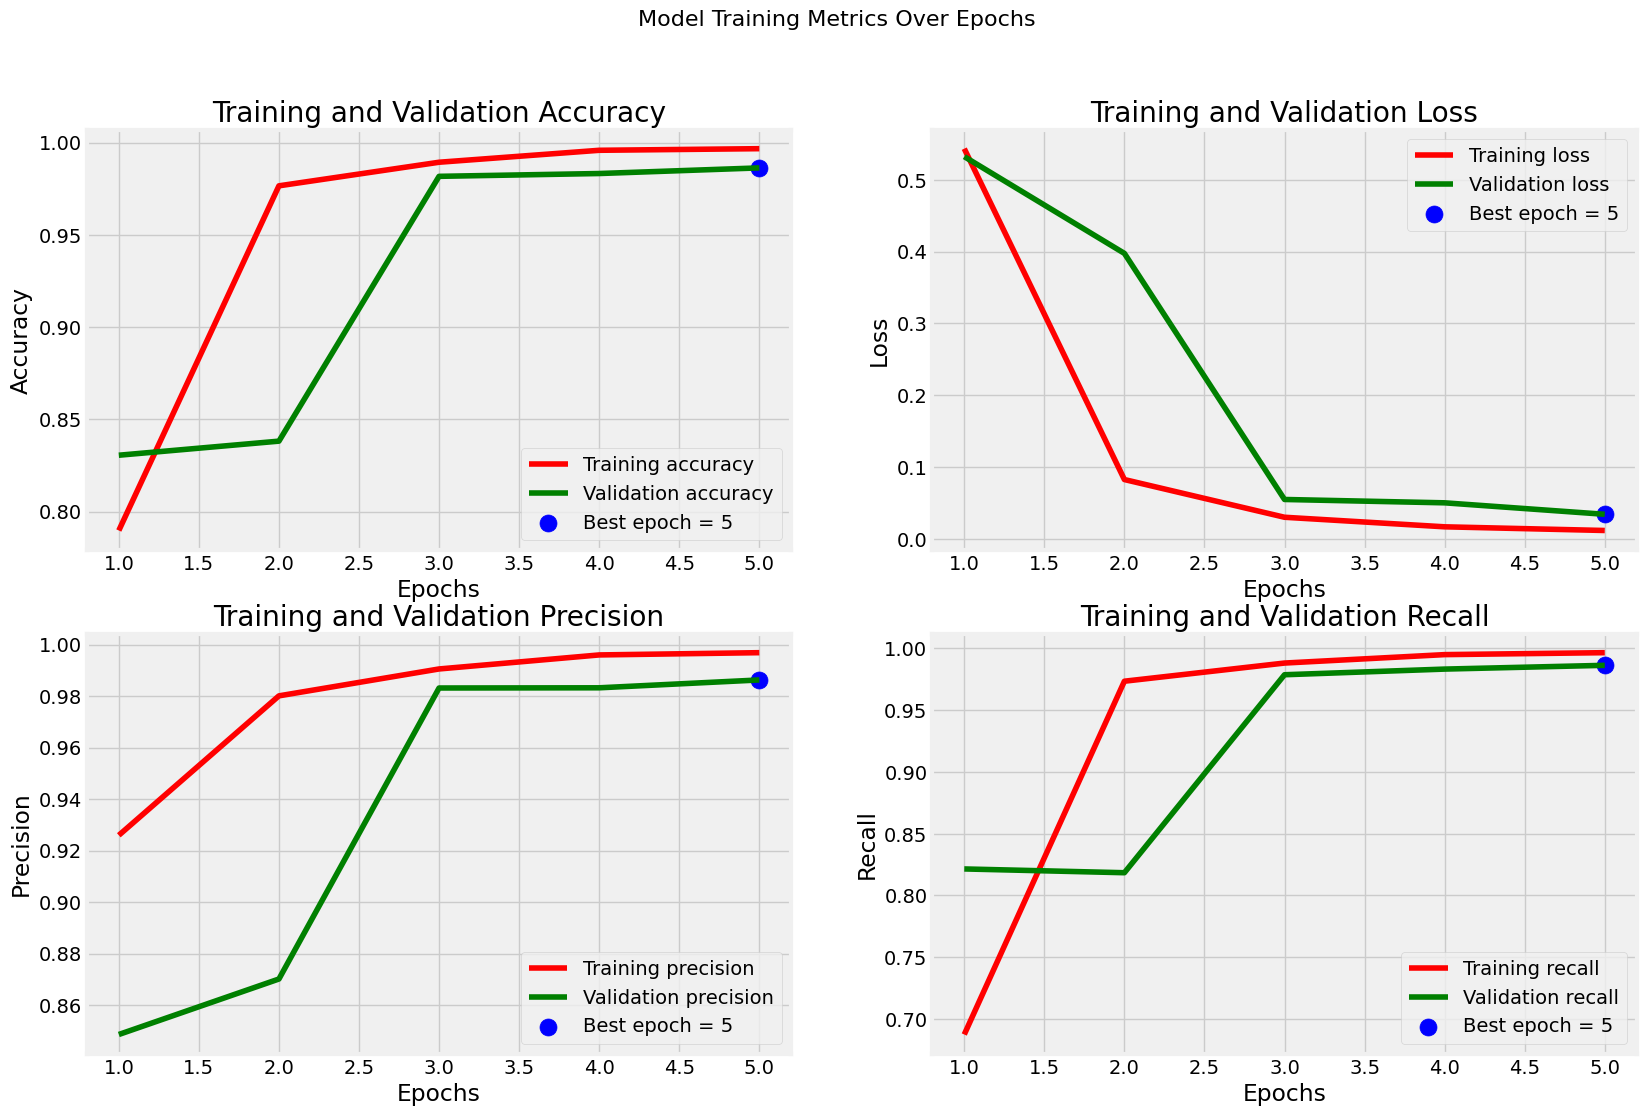

In [ ]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

#Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy : {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy : {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

179/179 ━━━━━━━━━━━━━━━━━━━━ 45s 252ms/step - accuracy: 0.9958 - loss: 0.0123 - precision: 0.9958 - recall: 0.9958
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 263ms/step - accuracy: 0.9825 - loss: 0.0623 - precision: 0.9825 - recall: 0.9825
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - accuracy: 0.9782 - loss: 0.1166 - precision: 0.9782 - recall: 0.9782
Train Accuracy : 99.60%
Train Loss: 0.0117


Validation Accuracy : 98.63%
Validation Loss: 0.0401


Test Accuracy : 98.48%
Test Loss: 0.0755


41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step


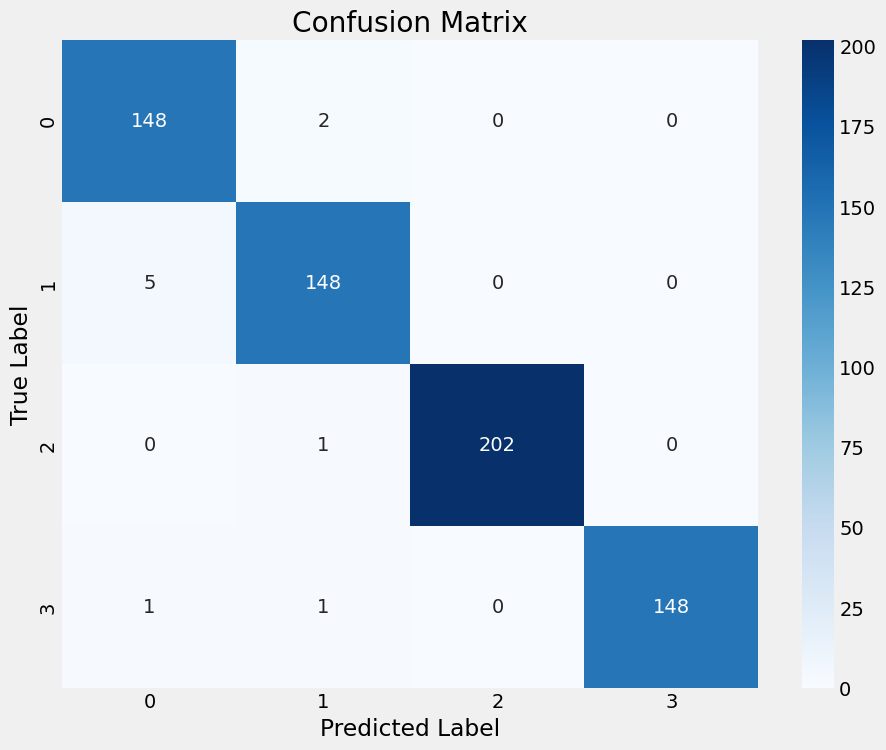

In [ ]:
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1) # Picks the type of tumor the model is most accurate at predicting

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

#Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from PIL import Image

def predict(img_path: str) -> None:
  # Get class labels
  labels = list(class_dict.keys())

  # Create figure
  plt.figure(figsize=(6,8))

  # Load and preprocess image
  img = Image.open(img_path)
  resized_img = img.resize((299, 299))
  img_array = np.asarray(resized_img)
  img_array = np.expand_dims(img_array, axis=0) / 255.0

  # Get model predictions
  predictions = model.predict(img_array)
  probabilities = list(predictions[0])

  # Get predicted class
  predicted_class_idx = np.argmax(probabilities)
  predicted_class = class_dict[predicted_class_idx]

  # Plot original image
  plt.subplot(2, 1, 1)
  plt.imshow(resized_img)
  plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

  # Plot prediction probabilities
  plt.subplot(2, 1, 2)
  bars = plt.barh(labels, probabilities)
  plt.xlabel("Probability", fontsize=15)
  plt.title("Class Probabilities")

  # Add probability labels to bars
  ax = plt.gca()
  ax.bar_label(bars, fmt="%.2f")

  plt.tight_layout()
  plt.show()

  print(f"\nPredicted tumor type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


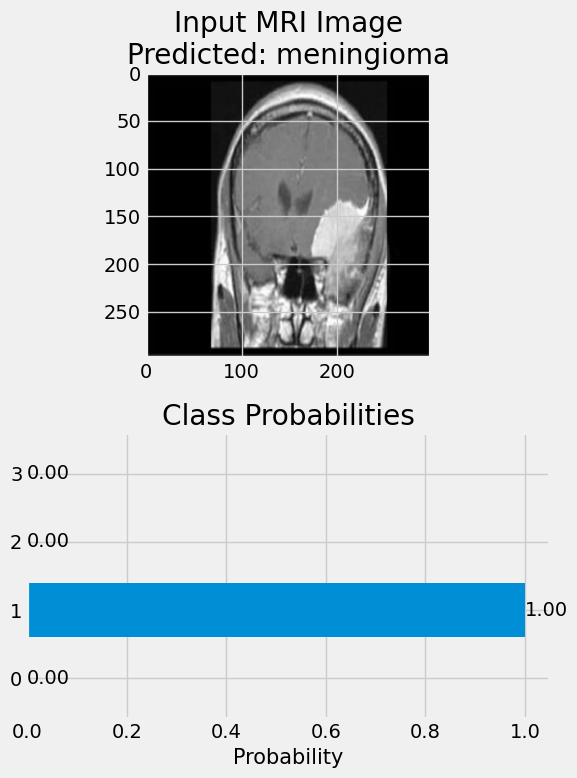


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


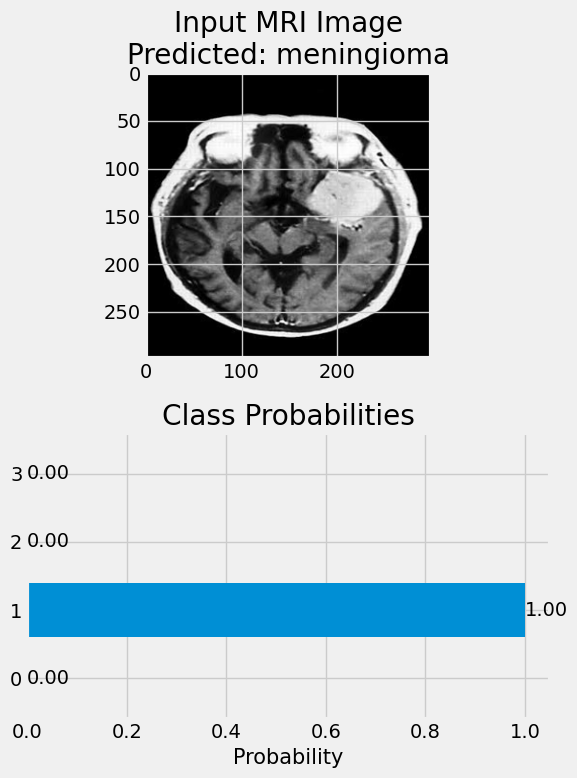


Predicted tumor type: meningioma


In [ ]:
predict("/content/Testing/meningioma/Te-meTr_0005.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


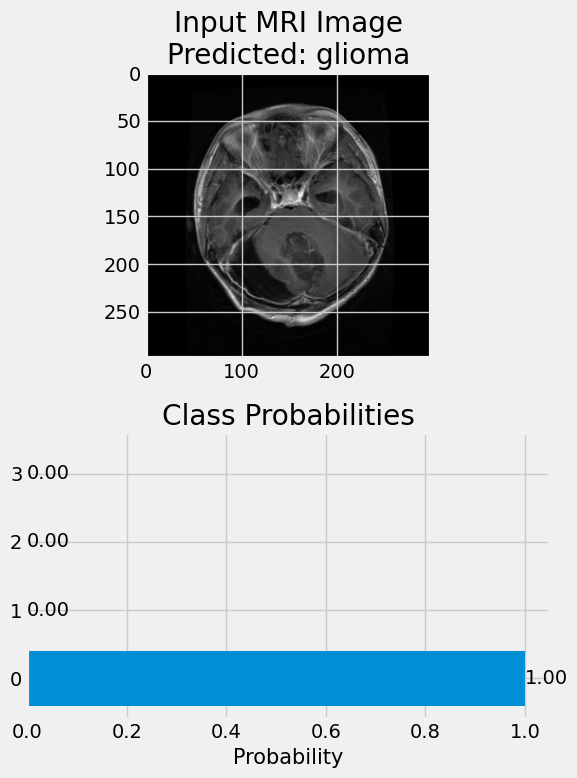


Predicted tumor type: glioma


In [ ]:
predict("/content/Testing/glioma/Te-glTr_0000.jpg")

In [ ]:
model.save_weights("xception_model.weights.h5")

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import regularizers

In [ ]:
# Preprocessing the data
batch_size = 16

img_size = (224, 224)

image_generator = ImageDataGenerator(
    rescale=1/255,
    brightness_range=(0.8, 1.2)
)

ts_gen = ImageDataGenerator(
    rescale=1/255
)

#Creating 3 data flows, testing, training, validating
tr_gen = image_generator.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size,  target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size,  target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=16,  target_size=img_size, shuffle=False)


Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


In [ ]:
# Create a sequential model

cnn_model = Sequential() # Stacking layers on top of each other

# Convolutional layers
cnn_model.add(Conv2D(512, (3, 3), padding='same', input_shape=(224, 224, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2))) # Prioritizes the most important features

cnn_model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for fully connected layers
cnn_model.add(Flatten())

# Fully connected layers
cnn_model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dropout(0.35))

cnn_model.add(Dense(4, activation='softmax')) # Output layer with 4 neurons for the 4 classes

# Compile the model
cnn_model.compile(Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

# Display the model summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 512)       │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 512)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 256)       │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 56, 56, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,211,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,620 (18.22 MB)

 Trainable params: 4,775,620 (18.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = cnn_model.fit(tr_gen, epochs=10, validation_data=valid_gen)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


357/357 ━━━━━━━━━━━━━━━━━━━━ 167s 384ms/step - accuracy: 0.5726 - loss: 2.2130 - precision: 0.6729 - recall: 0.3759 - val_accuracy: 0.7511 - val_loss: 0.9196 - val_precision: 0.7939 - val_recall: 0.6763
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 144s 290ms/step - accuracy: 0.8127 - loss: 0.7159 - precision: 0.8379 - recall: 0.7778 - val_accuracy: 0.7985 - val_loss: 0.6856 - val_precision: 0.8041 - val_recall: 0.7710
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 142s 290ms/step - accuracy: 0.8549 - loss: 0.5423 - precision: 0.8691 - recall: 0.8321 - val_accuracy: 0.8489 - val_loss: 0.5119 - val_precision: 0.8623 - val_recall: 0.8321
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 284ms/step - accuracy: 0.8855 - loss: 0.4392 - precision: 0.8953 - recall: 0.8739 - val_accuracy: 0.8702 - val_loss: 0.4875 - val_precision: 0.8836 - val_recall: 0.8458
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 102s 286ms/step - accuracy: 0.9224 - loss: 0.3673 - precision: 0.9306 - recall: 0.9132 - val_accuracy: 0.8931 - val

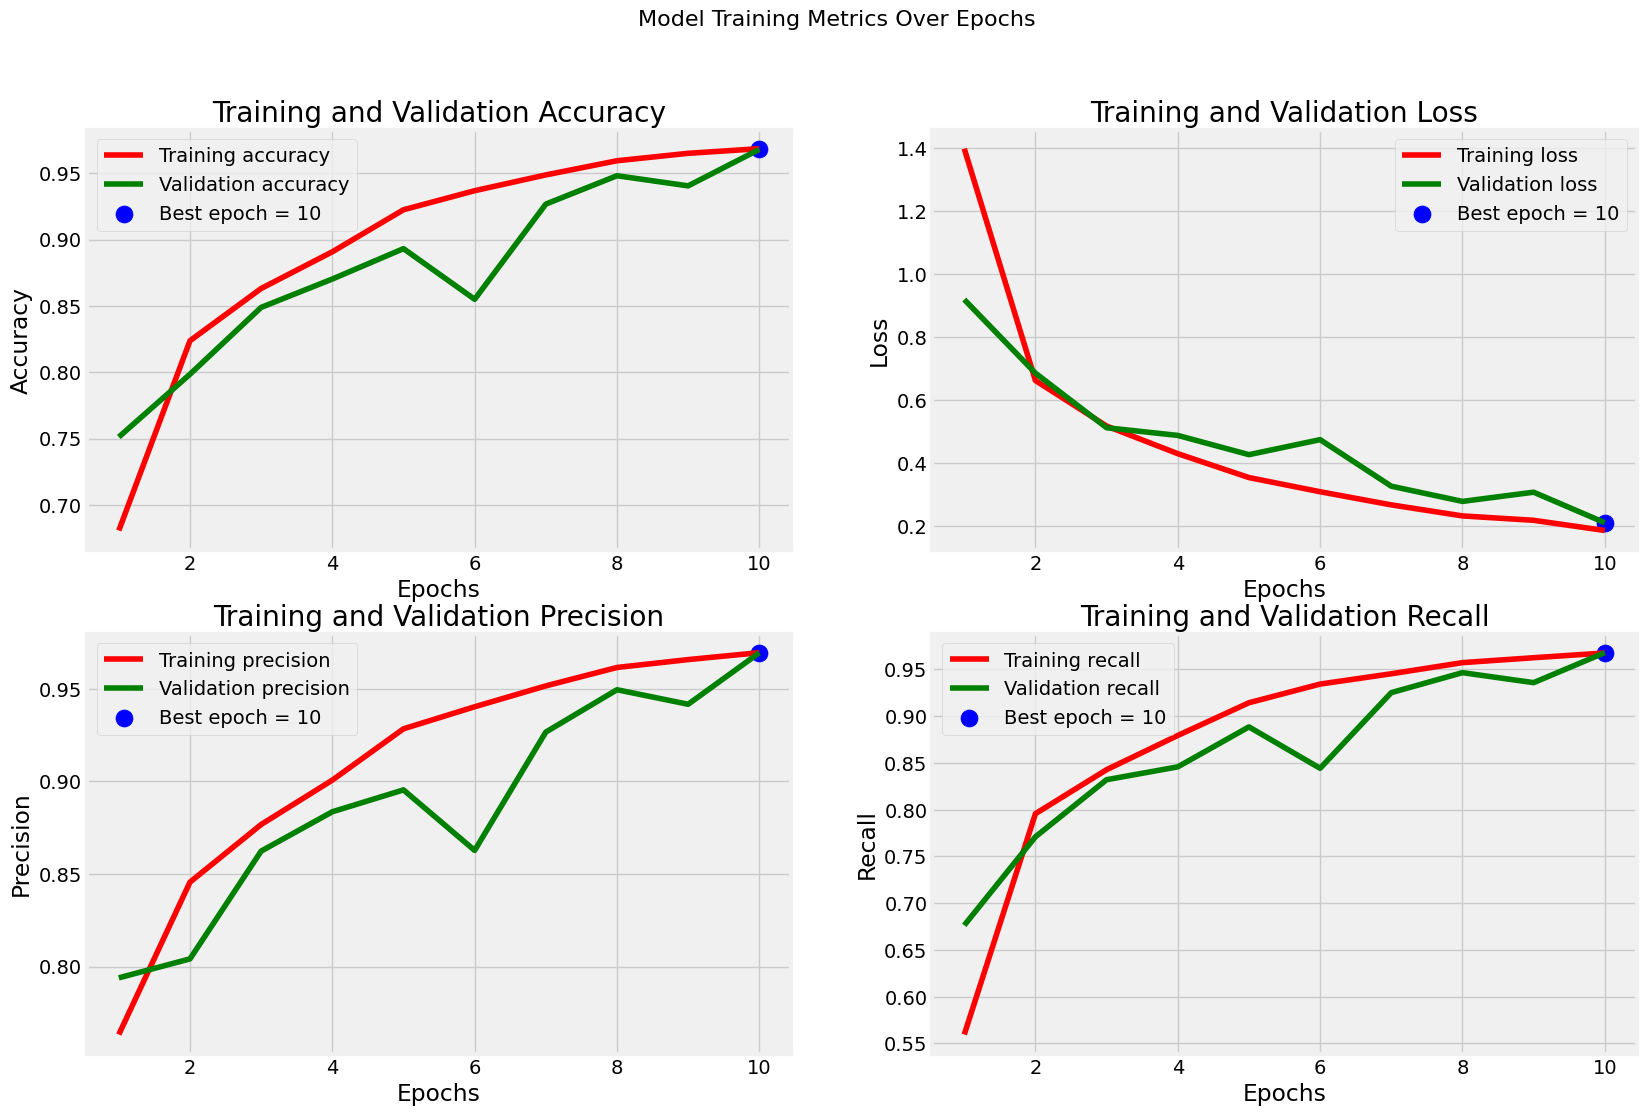

In [ ]:
#Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: history.history[m] for m in metrics}
val_metrics = {m: history.history[f'val_{m}'] for m in metrics}

#Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
  if m == 'loss':
    idx = np.argmin(val_metrics[m])
  else:
    idx = np.argmax(val_metrics[m])
  best_epochs[m] = idx + 1
  best_values[m] = val_metrics[m][idx]

#Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
  plt.subplot(2, 2, i)
  epochs = range(1, len(tr_metrics[metric]) + 1)

  plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
  plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
  plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue', label=f'Best epoch = {best_epochs[metric]}')

  plt.title(f'Training and Validation {metric.title()}')
  plt.xlabel('Epochs')
  plt.ylabel(metric.title())
  plt.legend()
  plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [ ]:
train_score = cnn_model.evaluate(tr_gen, verbose=1)
valid_score = cnn_model.evaluate(valid_gen, verbose=1)
test_score = cnn_model.evaluate(ts_gen, verbose=1)

print(f"Train Accuracy : {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"\n\nValidation Accuracy : {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\n\nTest Accuracy : {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

357/357 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.9919 - loss: 0.1363 - precision: 0.9919 - recall: 0.9911
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.9754 - loss: 0.2147 - precision: 0.9756 - recall: 0.9750
 1/41 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.9375 - loss: 0.2410 - precision: 0.9375 - recall: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9581 - loss: 0.2332 - precision: 0.9580 - recall: 0.9569
Train Accuracy : 99.07%
Train Loss: 0.1386


Validation Accuracy : 97.10%
Validation Loss: 0.2150


Test Accuracy : 96.65%
Test Loss: 0.2077


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step


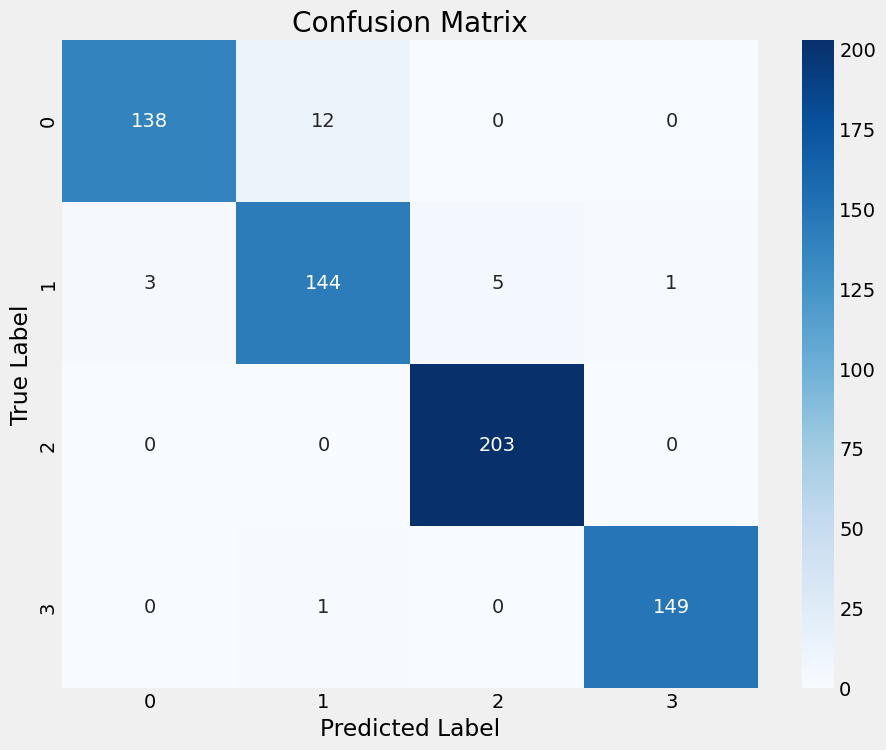

In [ ]:
preds = cnn_model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1) # Picks the type of tumor the model is most accurate at predicting

class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'notumor',
    3: 'pituitary'
}

#Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
clr = classification_report(ts_gen.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       150
           1       0.92      0.94      0.93       153
           2       0.98      1.00      0.99       203
           3       0.99      0.99      0.99       150

    accuracy                           0.97       656
   macro avg       0.97      0.96      0.96       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
cnn_model.save("cnn_model_10_epochs.h5")

In [ ]:
! pip install streamlit pyngrok python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 135.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 134.0 MB/s eta 0:00:00


In [ ]:
from threading import Thread
from pyngrok import ngrok
from google.colab import userdata

In [ ]:
ngrok_token = userdata.get('NGROK_AUTH_TOKEN')

ngrok.set_auth_token(ngrok_token)

In [ ]:
def run_streamlit():
  os.system("streamlit run /content/app.py --server.port 8501")

In [ ]:
%%writefile app.py

import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import plotly.graph_objects as go
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import google.generativeai as genai
from google.colab import userdata
import PIL.Image
import os
from google.colab import userdata
from dotenv import load_dotenv
load_dotenv()

genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

output_dir = 'saliency_maps'
os.makedirs(output_dir, exist_ok=True)

def generate_explanation(img_path, model_prediction, confidence):

  prompt = f"""You are an expert neurologist. You are tasked with explaining a saliency map of a brain tumor MRI scan.
  The saliency map was generated by a deep learning model that was trained to classify brain tumors as either glioma,
  meningioma, pituitary, or no tumor.

  The saliency map highlights the regions of the image that the machine learning model is focusing on to make the prediction.

  The deep learning model predicted the image to be of class '{model_prediction}' with a confidence of {confidence * 100}%.

  In your response:
  - Explain what regions of the brain the model is focusing on, based on the saliency map. Refer to the regions highlighted
  in light cyan, those are the regions where the model is focusing on.
  - Explain possible reasons why the model made the prediction it did.
  - Don't mention anything like 'The saliency map highlights the regions the model is focusing on, which are in light cyan'
  in your explanation.
  - Keep your explanation to 4 sentences max.

  Let's think step by step about this. Verify step by step.
  """

  img = PIL.Image.open(img_path)

  model = genai.GenerativeModel(model_name="gemini-1.5-flash")
  response = model.generate_content([prompt, img])

  return response.text

def generate_saliency_map(model, img_array, class_index, img_size):
  with tf.GradientTape() as tape:
    img_tensor = tf.convert_to_tensor(img_array)
    tape.watch(img_tensor)
    predictions = model(img_tensor)
    target_class = predictions[:, class_index]

  gradients = tape.gradient(target_class, img_tensor)
  gradients = tf.math.abs(gradients)
  gradients = tf.reduce_max(gradients, axis=-1)
  gradients = gradients.numpy().squeeze()

  # Resize gradients to match original image size
  gradients = cv2.resize(gradients, img_size)

  # Create a circular mask for the brain area
  center = (gradients.shape[0] // 2, gradients.shape[1] // 2)
  radius = min(center[0], center[1]) - 10
  y, x = np.ogrid[:gradients.shape[0], :gradients.shape[1]]
  mask = (x - center[0])**2 + (y - center[1])**2 <= radius**2

  # Apply mask to gradients
  gradients = gradients * mask

  # Normalize only the brain area
  brain_gradients = gradients[mask]
  if brain_gradients.max() > brain_gradients.min():
    brain_gradients = (brain_gradients - brain_gradients.min()) / (brain_gradients.max() - brain_gradients.min())
  gradients[mask] = brain_gradients

  # Apply a higher threshold
  threshold = np.percentile(gradients[mask], 80)
  gradients[gradients < threshold] = 0

  # Apply more aggressive smoothing
  gradients = cv2.GaussianBlur(gradients, (11, 11), 0)

  # Create a heatmap overlay with enhance contrast
  heatmap = cv2.applyColorMap(np.uint8(255 * gradients), cv2.COLORMAP_JET)
  heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

  # Resize heatmap to match original image size
  heatmap = cv2.resize(heatmap, img_size)

  #Superimpose the heatmap on original image with increased opacity
  original_img = image.img_to_array(img)
  superimposed_img = heatmap * 0.7 + original_img * 0.3
  superimposed_img = superimposed_img.astype(np.uint8)

  img_path = os.path.join(output_dir, uploaded_file.name)
  with open(img_path, "wb") as f:
    f.write(uploaded_file.getbuffer())

  saliency_map_path = f'saliency_maps/{uploaded_file.name}'

  # Save the saliency map
  cv2.imwrite(saliency_map_path, cv2.cvtColor(superimposed_img, cv2.COLOR_RGB2BGR))

  return superimposed_img

def load_xception_model(model_path):
  img_shape = (299, 299, 3)
  base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_shape=img_shape, pooling='max')
  model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
  ])

  model.build((None,) + img_shape)

  # Compile the model
  model.compile(Adamax(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy',
                Precision(),
                Recall()])

  model.load_weights(model_path)

  return model

st.title("Brain Tumor Classification")

st.write("Upload an image of a brain MRI scan to classify.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:

  selected_model = st.radio(
    "Select Model",
    ("Transfer Learning - Xception", "Custom CNN")
  )

  if selected_model == "Transfer Learning - Xception":
    model = load_xception_model('/content/xception_model.weights.h5')
    img_size = (299, 299)
  else:
    model = load_model('/content/cnn_model_10_epochs.h5')
    img_size = (224, 224)

  labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']
  img = image.load_img(uploaded_file, target_size=img_size)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  # Get the class with the highest probability
  class_index = np.argmax(prediction[0])
  result = labels[class_index]

  saliency_map = generate_saliency_map(model, img_array, class_index, img_size)

  col1, col2 = st.columns(2)
  with col1:
    st.image(uploaded_file, caption="Uploaded Image", use_container_width=True)
  with col2:
    st.image(saliency_map, caption="Saliency Map", use_container_width=True)

  st.write("## Classification Results")

  result_container = st.container()
  result_container = st.container()
  result_container.markdown(
      f"""
      <div syle="background-color: #000000; color: #ffffff; padding: 30px; border-radius: 15px;">
        <div style="display: flex; justify-content: space-between; align-items: center;">
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Prediction</h3>
            <p style="font-size: 36px; font-weight: 800; color: #FF0000; margin: 0;">
              {result}
            </p>
          </div>
          <div style="width: 2px; height: 80px; background-color: #ffffff; margin: 0 20px;"></div>
          <div style="flex: 1; text-align: center;">
            <h3 style="color: #ffffff; margin-bottom: 10px; font-size: 20px;">Confidence</h3>
            <p style="font-size: 36px; font-weight: 800; color: #2196F3; margin: 0;">
              {prediction[0][class_index]:.4%}
            </p>
          </div>
        </div>
      </div>
      """,
      unsafe_allow_html=True
  )

  # Prepare data for Plotly chart
  probabilities = prediction[0]
  sorted_indices = np.argsort(probabilities)[::-1]
  sorted_labels = [labels[i] for i in sorted_indices]
  sorted_probabilities = probabilities[sorted_indices]

  # Create a Plotly bar chart
  fig = go.Figure(go.Bar(
      x=sorted_probabilities,
      y=sorted_labels,
      orientation='h',
      marker_color=['red' if label == result else 'blue' for label in sorted_labels]
  ))

  # Customize the chart layout
  fig.update_layout(
      title='Probabilities for each class',
      xaxis_title='Probability',
      yaxis_title='Class',
      height=400,
      width=600,
      yaxis=dict(autorange='reversed')
  )

  # Add value labels to the bars
  for i, prob in enumerate(sorted_probabilities):
    fig.add_annotation(
        x=prob,
        y=i,
        text=f'{prob:.4f}',
        showarrow=False,
        xanchor='left',
        xshift=5
    )

  # Display the Plotly chart
  st.plotly_chart(fig)



  saliency_map_path = f'saliency_maps/{uploaded_file.name}'
  explanation = generate_explanation(saliency_map_path, result, prediction[0][class_index])

  st.write("## Explanation")
  st.write(explanation)

Overwriting app.py


In [ ]:
thread = Thread(target=run_streamlit)
thread.start()

In [ ]:
public_url = ngrok.connect(addr='8501', proto='http', bind_tls=True)

print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://b637-34-90-27-150.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
tunnels = ngrok.get_tunnels()
for tunnel in tunnels:
  print(f"Closing tunnel: {tunnel.public_url} -> {tunnel.config['addr']}")
  ngrok.disconnect(tunnel.public_url)

Closing tunnel: https://945e-34-90-27-150.ngrok-free.app -> http://localhost:8501


In [ ]:
pip install --upgrade pip

Writing .env
